<a href="https://colab.research.google.com/github/swain231/Customer-Classification/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [3]:
import yfinance as yf
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
def fetch_stock_data(ticker, start_date="2022-01-01", end_date=None):
    if end_date is None:
        end_date = datetime.today().strftime('%Y-%m-%d')
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    return data

In [6]:
def save_to_db(df, ticker, db_name="stock_data.db"):
    conn = sqlite3.connect(db_name)
    table_name = ticker.replace(".", "_")
    df.to_sql(table_name, conn, if_exists="replace", index=False)
    conn.close()
    print(f"Data for {ticker} saved to table '{table_name}' in {db_name}.")

In [7]:
ticker = "AAPL"  # Apple Inc.
start = "2023-01-01"
end = "2024-01-01"

# Fetch data
stock_df = fetch_stock_data(ticker, start, end)

# Display the first few rows
stock_df.head()

# Save to database
save_to_db(stock_df, ticker)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data for AAPL saved to table 'AAPL' in stock_data.db.


In [8]:
def query_data(ticker, db_name="stock_data.db"):
    conn = sqlite3.connect(db_name)
    table_name = ticker.replace(".", "_")
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
    conn.close()
    return df

query_data("AAPL")

,"('Date', '')","('Close', 'AAPL')","('High', 'AAPL')","('Low', 'AAPL')","('Open', 'AAPL')","('Volume', 'AAPL')"
0,2023-01-03 00:00:00,123.632530,129.395518,122.742873,128.782649,112117500
1,2023-01-04 00:00:00,124.907700,127.181268,123.642412,125.431607,89113600
2,2023-01-05 00:00:00,123.583099,126.301493,123.326093,125.668849,80962700
3,2023-01-06 00:00:00,128.130219,128.792516,123.454587,124.561717,87754700
4,2023-01-09 00:00:00,128.654144,131.876686,128.397138,128.970474,70790800


In [9]:
# Fetch AAPL data
df = yf.download("AAPL", start="2022-01-01", end="2024-01-01")

# Use only Close price
df = df[['Close']].copy()

# Create target column: next day's price
df['Target'] = df['Close'].shift(-1)

# Drop last row (since it has NaN target)
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
# Features and Target
X = df[['Close']].values
y = df['Target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Root Mean Squared Error: 2.14


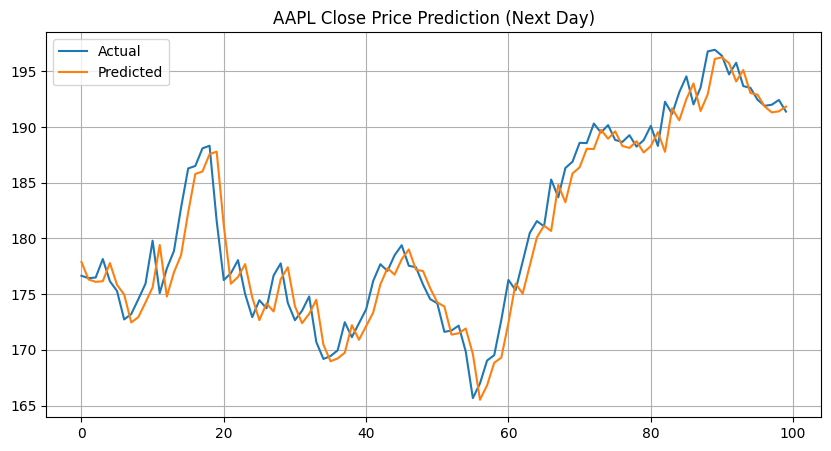

In [11]:
# Calculate RMSE
# The squared parameter was introduced in scikit-learn version 0.22.
# If you are using an older version, you may need to calculate RMSE manually:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot real vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("AAPL Close Price Prediction (Next Day)")
plt.legend()
plt.grid(True)
plt.show()